# Silicon Equation of State

Below we plot the data found from the silicon script: energy as a function of lattice constant for a range of lattice constants from 9.8 to 10.7 Bohr. We see that it exhibits a parabolic shape. 

Then we can fit to this a model for the energy as a function of lattice constant. 
- The most naive approach is to use a truncated Taylor expansion about the potential minimum
- We can also fit this to an phenomenological model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('retina')

In [2]:
data_df = pd.read_csv('/Users/vinhtran/Downloads/handson_pwscf/Silicon/si.etot_vs_alat',\
                   sep = ' ', header = None, names = ['Alat', 'Etot'])

In [3]:
data_df

,Alat,Etot
0,9.8,-15.833459
1,9.9,-15.839713
2,10.0,-15.843980
3,10.1,-15.846618
4,10.2,-15.847546
5,10.3,-15.847005
6,10.4,-15.845127
7,10.5,-15.842091
8,10.6,-15.837892
9,10.7,-15.832731


In [4]:
data = data_df.to_numpy()
alat = data[:,0]
etot = data[:,1]

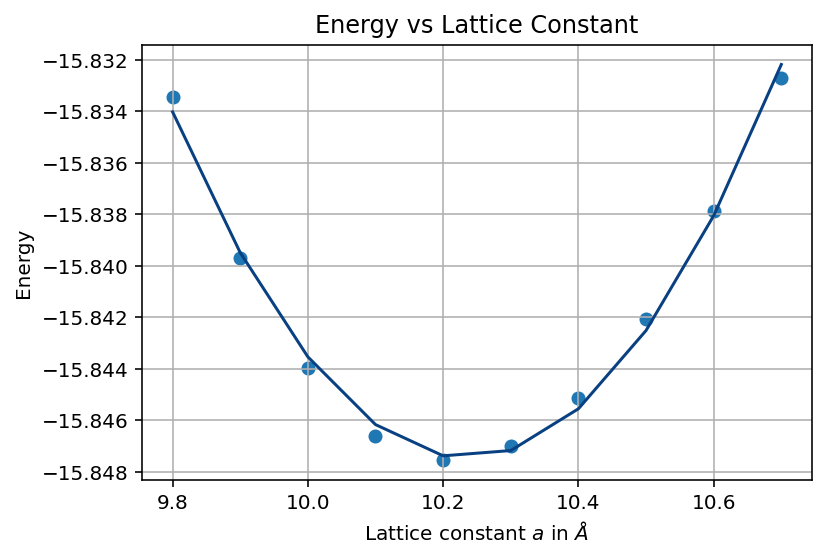

In [10]:
plt.scatter(alat, etot)
plt.plot(alat, taylor(alat, *popt_taylor), color = '#084081')
plt.xlabel('Lattice constant $a$ in $\AA$')
plt.ylabel('Energy')
plt.title('Energy vs Lattice Constant')
plt.grid()
plt.show()

### Taylor
We can Taylor expand about the 
$$
    E(a) \approx E(a_0) + \frac{\partial^2 E}{\partial a^2}(a-a_0)^2
$$

In [6]:
def taylor(x, x0, a, b):
    return b + a*(x-x0)**2

In [7]:
popt_taylor, pcov_taylor = curve_fit(taylor, alat, etot)

In [8]:
popt_taylor

array([ 10.2355672 ,   0.07089314, -15.84747969])

In [9]:
a = popt_taylor[0]
a

10.23556719776393